### First, let's add more features to see if that will improve.

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
#X = iris["data"][:,3:]  # petal width
X = iris["data"][:,:]
y = (iris["target"]==2).astype(np.int)
X.shape, y.shape

((150, 4), (150,))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, X_test.shape

((108, 4), (27, 4), (15, 4))

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def binary_loss(X, Y, weights, alpha=0.00001):
    """
    X.shape = (num_instances, num_features)
    Y.shape = (num_instances,)
    weights.shape = (num_features,)
    """
    z = np.dot(X, weights)
    h = sigmoid(z)
    total_cost = (-Y*np.log(h) - (1-Y)*np.log(1-h)).mean() + alpha * np.sum(np.dot(weights, weights.T))
    return total_cost

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], lr=0.1, alpha=0.00001, epochs=5, tolerance=0.0001, print_progress=True):
    train_loss_history, val_loss_history = [], []
    num_features = X_tr.shape[1]
    #weights = np.zeros(shape=(num_features,), dtype=np.float64)
    weights = np.random.randn(num_features)
    clip_value = 1e-9
    #X_tr = np.clip(X_tr, clip_value, 1-clip_value)
    mms = MinMaxScaler()
    #mms = StandardScaler()
    X_tr = mms.fit_transform(X_tr)
    for epoch in range(epochs):
        indices = np.arange(X_tr.shape[0])
        np.random.shuffle(indices)
        X_tr = X_tr[indices]
        Y_tr = Y_tr[indices]

        # training loop
        train_loss = 0
        for idx, row in enumerate(X_tr):
            row = np.reshape(row, (1, num_features))
            train_loss += binary_loss(row, Y_tr[idx], weights, alpha)
            for i in range(len(row)):
                gradient = (sigmoid(row @ weights) - float(Y_tr[idx])) * row[0, i] + alpha*weights[i]
                weights[i] = weights[i] - lr*gradient
        train_loss /= X_tr.shape[0]
        train_loss_history.append(train_loss)

        if len(X_dev) != 0 and len(Y_dev) != 0:
            X_dev = mms.transform(X_dev)
            val_loss = binary_loss(X_dev, Y_dev, weights, alpha)
            val_loss_history.append(val_loss)

            if print_progress:
                print(f"Epoch: {epoch+1}")
                print(f"Training loss:   {train_loss:.4f}")
                print(f"Validation loss: {val_loss:.4f}")

            # Wang seems to want the training process to stop when the progress becomes no longer significant.
            if epoch >=1:
                if np.abs(val_loss_history[epoch]-val_loss_history[epoch-1]) < tolerance:
                    break

    return weights, train_loss_history, val_loss_history

In [7]:
n_epochs = 100
w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=False)

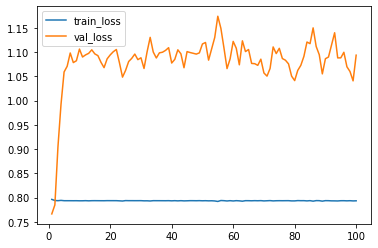

In [8]:
import matplotlib.pyplot as plt
x = range(1, len(train_hist)+1)
plt.plot(x, train_hist, label="train_loss")
plt.plot(x, val_hist, label="val_loss")
plt.legend();

In [9]:
#prediction = 

### Let's try to train with `LogisticRegression`

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
y_val_pred = log_reg.predict(X_val)
confusion_matrix(y_val, y_val_pred)

array([[17,  0],
       [ 0, 10]])

In [13]:
y_test_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[12,  0],
       [ 0,  3]])

### Bias term
Maybe the problem was that we do not manually add a bias term?

In [14]:
X_train.shape

(108, 4)

In [15]:
X_t = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_t.shape

(108, 5)

In [16]:
X_v = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_v.shape

(27, 5)

In [17]:
X_te = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_te.shape

(15, 5)

In [18]:
n_epochs = 100
w, train_hist, val_hist = SGD(X_t, y_train, X_dev=X_v, Y_dev=y_val, epochs=n_epochs, print_progress=False)

/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: Run

/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9:

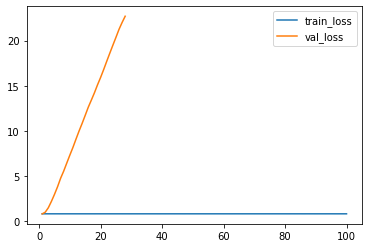

In [19]:
import matplotlib.pyplot as plt
x = range(1, len(train_hist)+1)
plt.plot(x, train_hist, label="train_loss")
plt.plot(x, val_hist, label="val_loss")
plt.legend();

No, this is not where the problem lies.

### The most suspectible being the function `SGD()`
Let's look closer into this function.

### No `clip()`

- It is weird to `clip()` the training data values unless we are really sure about the range of our data values
  - I don't know the originally NLP dataset, but `clip()` is not suitable for Iris dataset here.

In [20]:
np.clip(-7, 0, 10), np.clip(38, 0, 10)

(0, 10)

In [21]:
X_train[:10, :]

array([[6.7, 2.5, 5.8, 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [6. , 2.2, 5. , 1.5],
       [7.6, 3. , 6.6, 2.1],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 4.2, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1]])

Problems in the function `SGD()`:
- The training loss is no longer quite accurate, albeit acceptable. In particular, it is unfair to compare `val_loss` with `train_loss`; only looking the history exclusively within each one makes sense.
- $\frac{\partial L}{\partial w_i} = (h-y)x_i + 2\alpha w_i\quad$ if $\quad L = -y\log h - (1-y)\log (1-h) + \alpha \lVert w \rVert^2$

In [22]:
row = np.arange(1*3).reshape((1,3))
weights = np.random.randn(3)
row, weights

(array([[0, 1, 2]]), array([-1.43206966, -0.42419155,  1.66264667]))

In [23]:
row @ weights

array([2.90110179])

In [24]:
np.dot(row, weights)

array([2.90110179])

In [25]:
def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], lr=0.1, alpha=0.00001, epochs=5, tolerance=0.0001, print_progress=True):
    train_loss_history, val_loss_history = [], []
    num_features = X_tr.shape[1]
    #weights = np.zeros(shape=(num_features,), dtype=np.float64)
    weights = np.random.randn(num_features)
    #clip_value = 1e-9
    #X_tr = np.clip(X_tr, clip_value, 1-clip_value)
    mms = MinMaxScaler()
    #mms = StandardScaler()
    X_tr = mms.fit_transform(X_tr)
    for epoch in range(epochs):
        indices = np.arange(X_tr.shape[0])
        np.random.shuffle(indices)
        X_tr = X_tr[indices]
        Y_tr = Y_tr[indices]

        # training loop
        train_loss = 0
        for idx, row in enumerate(X_tr):
            row = np.reshape(row, (1, num_features))
            train_loss += binary_loss(row, Y_tr[idx], weights, alpha)
            for i in range(len(row)):
                gradient = (sigmoid(row @ weights) - float(Y_tr[idx])) * row[0, i] + alpha*weights[i]*2
                weights[i] -= lr*gradient
        train_loss /= X_tr.shape[0]
        train_loss_history.append(train_loss)

        if len(X_dev) != 0 and len(Y_dev) != 0:
            X_dev = mms.transform(X_dev)
            val_loss = binary_loss(X_dev, Y_dev, weights, alpha)
            val_loss_history.append(val_loss)

            if print_progress:
                print(f"Epoch: {epoch+1}")
                print(f"Training loss:   {train_loss:.4f}")
                print(f"Validation loss: {val_loss:.4f}")

            # Wang seems to want the training process to stop when the progress becomes no longer significant.
            #if epoch >=1:
            #    if np.abs(val_loss_history[epoch]-val_loss_history[epoch-1]) < tolerance:
            #        break

    return weights, train_loss_history, val_loss_history

In [26]:
#w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=False)
w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=False, alpha=0)

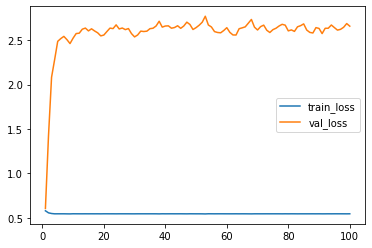

In [27]:
x = range(1, len(train_hist)+1)
plt.plot(x, train_hist, label="train_loss")
plt.plot(x, val_hist, label="val_loss")
plt.legend();

In [28]:
y_train_pred = (sigmoid(X_train @ w) > 0.5).astype(np.int)
y_train_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1])

In [29]:
confusion_matrix(y_train, y_train_pred)

array([[58, 13],
       [ 0, 37]])

In [30]:
y_val_pred = (sigmoid(X_val @ w) > 0.5).astype(np.int)
y_val_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1])

In [31]:
confusion_matrix(y_val, y_val_pred)

array([[14,  3],
       [ 0, 10]])

In [32]:
y_test_pred = (sigmoid(X_test @ w) > 0.5).astype(np.int)
y_test_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [33]:
confusion_matrix(y_test, y_test_pred)

array([[9, 3],
       [0, 3]])

In [34]:
n_epochs = 100
w, train_hist, val_hist = SGD(X_t, y_train, X_dev=X_v, Y_dev=y_val, epochs=n_epochs, print_progress=False)
#w, train_hist, val_hist = SGD(X_t, y_train, X_dev=X_v, Y_dev=y_val, epochs=n_epochs, print_progress=False, lr=0.04)
#w, train_hist, val_hist = SGD(X_t, y_train, X_dev=X_v, Y_dev=y_val, epochs=n_epochs, print_progress=False, alpha=0)

### Add bias term
**(?)** Why adding bias term gets consistently bad results? Can you explain?

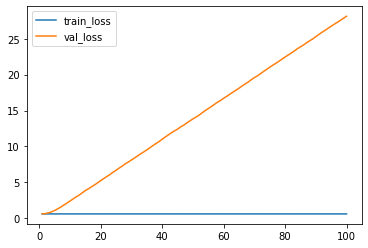

In [35]:
x = range(1, len(train_hist)+1)
plt.plot(x, train_hist, label="train_loss")
plt.plot(x, val_hist, label="val_loss")
plt.legend();

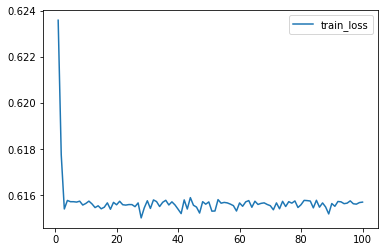

In [36]:
x = range(1, len(train_hist)+1)
plt.plot(x, train_hist, label="train_loss")
plt.legend();

In [37]:
y_val_pred = (sigmoid((X_v @ w)) > 0.5).astype(np.int)
y_val_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [38]:
confusion_matrix(y_val, y_val_pred)

array([[ 0, 17],
       [ 0, 10]])

In [39]:
y_test_pred = (sigmoid(X_te @ w) > 0.5).astype(np.int)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
confusion_matrix(y_test, y_test_pred)

array([[ 0, 12],
       [ 0,  3]])

### Curious. I cannot seem to spot the bug.
Let's try with [`sklearn.linear_model.SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) to see how good it can be.

In [41]:
from sklearn.linear_model import SGDClassifier

In [42]:
clf = SGDClassifier(loss="log")
clf.fit(X_train, y_train)

SGDClassifier(loss='log')

In [43]:
y_train_pred = clf.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[40, 31],
       [ 0, 37]])

In [44]:
y_test_pred = clf.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[7, 5],
       [0, 3]])

In [45]:
y_val_pred = clf.predict(X_val)
confusion_matrix(y_val, y_val_pred)

array([[ 8,  9],
       [ 0, 10]])

### Stopping criterion
We didn't stop right at where our model's weight give best validation error, let's try that.

In [46]:
np.inf

inf

In [47]:
def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], lr=0.1, alpha=0.0001, epochs=5, tolerance=0.0001, print_progress=True):
    train_loss_history, val_loss_history = [], []
    num_features = X_tr.shape[1]
    #weights = np.zeros(shape=(num_features,), dtype=np.float64)
    weights = np.random.randn(num_features)
    #clip_value = 1e-9
    #X_tr = np.clip(X_tr, clip_value, 1-clip_value)
    mms = MinMaxScaler()
    #mms = StandardScaler()
    X_tr = mms.fit_transform(X_tr)
    best_val_loss = np.inf
    for epoch in range(epochs):
        indices = np.arange(X_tr.shape[0])
        np.random.shuffle(indices)
        X_tr = X_tr[indices]
        Y_tr = Y_tr[indices]

        # training loop
        train_loss = 0
        for idx, row in enumerate(X_tr):
            row = np.reshape(row, (1, num_features))
            train_loss += binary_loss(row, Y_tr[idx], weights, alpha)
            for i in range(len(row)):
                gradient = (sigmoid(row @ weights) - float(Y_tr[idx])) * row[0, i] + alpha*weights[i]*2
                weights[i] -= lr*gradient
        train_loss /= X_tr.shape[0]
        train_loss_history.append(train_loss)

        if len(X_dev) != 0 and len(Y_dev) != 0:
            X_dev = mms.transform(X_dev)
            val_loss = binary_loss(X_dev, Y_dev, weights, alpha)
            val_loss_history.append(val_loss)

            if print_progress:
                print(f"Epoch: {epoch+1}")
                print(f"Training loss:   {train_loss:.4f}")
                print(f"Validation loss: {val_loss:.4f}")

            # Wang seems to want the training process to stop when the progress becomes no longer significant.
            #if epoch >=1:
            #    if np.abs(val_loss_history[epoch]-val_loss_history[epoch-1]) < tolerance:
            #        break
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_weights = weights
                print(f"best epoch {epoch}")

    return best_weights, train_loss_history, val_loss_history

In [48]:
w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=False)
#w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=False, alpha=0)

best epoch 0
best epoch 1
best epoch 2
best epoch 12
best epoch 13
best epoch 29


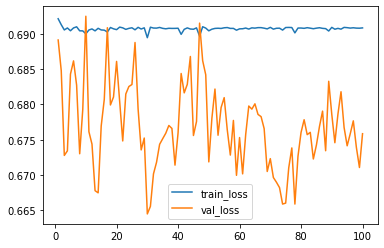

In [49]:
x = range(1, len(train_hist)+1)
plt.plot(x, train_hist, label="train_loss")
plt.plot(x, val_hist, label="val_loss")
plt.legend();

In [50]:
y_train_pred = (sigmoid(X_train @ w) > 0.5).astype(np.int)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [51]:
confusion_matrix(y_train, y_train_pred)

array([[36, 35],
       [37,  0]])

In [52]:
y_val_pred = (sigmoid(X_val @ w) > 0.5).astype(np.int)
y_val_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0])

In [53]:
confusion_matrix(y_val, y_val_pred)

array([[ 9,  8],
       [10,  0]])

In [54]:
y_test_pred = (sigmoid(X_test @ w) > 0.5).astype(np.int)
y_test_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [55]:
confusion_matrix(y_test, y_test_pred)

array([[6, 6],
       [3, 0]])

### Learning schedule

In [56]:
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

In [57]:
def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], lr=0.1, alpha=0.0001, epochs=5, tolerance=0.0001, print_progress=True):
    train_loss_history, val_loss_history = [], []
    num_features = X_tr.shape[1]
    #weights = np.zeros(shape=(num_features,), dtype=np.float64)
    weights = np.random.randn(num_features)
    #clip_value = 1e-9
    #X_tr = np.clip(X_tr, clip_value, 1-clip_value)
    mms = MinMaxScaler()
    #mms = StandardScaler()
    X_tr = mms.fit_transform(X_tr)
    best_val_loss = np.inf
    for epoch in range(epochs):
        indices = np.arange(X_tr.shape[0])
        np.random.shuffle(indices)
        X_tr = X_tr[indices]
        Y_tr = Y_tr[indices]

        # training loop
        train_loss = 0
        for idx, row in enumerate(X_tr):
            row = np.reshape(row, (1, num_features))
            train_loss += binary_loss(row, Y_tr[idx], weights, alpha)
            for i in range(len(row)):
                gradient = (sigmoid(row @ weights) - float(Y_tr[idx])) * row[0, i] + alpha*weights[i]*2
                eta = learning_schedule(epoch*len(X_tr)  + idx)
                weights[i] -= lr*gradient*eta
                #weights[i] -= gradient*eta
        train_loss /= X_tr.shape[0]
        train_loss_history.append(train_loss)

        if len(X_dev) != 0 and len(Y_dev) != 0:
            X_dev = mms.transform(X_dev)
            val_loss = binary_loss(X_dev, Y_dev, weights, alpha)
            val_loss_history.append(val_loss)

            if print_progress:
                print(f"Epoch: {epoch+1}")
                print(f"Training loss:   {train_loss:.4f}")
                print(f"Validation loss: {val_loss:.4f}")

            # Wang seems to want the training process to stop when the progress becomes no longer significant.
            #if epoch >=1:
            #    if np.abs(val_loss_history[epoch]-val_loss_history[epoch-1]) < tolerance:
            #        break
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_weights = weights
                print(f"best epoch {epoch}")

    return best_weights, train_loss_history, val_loss_history

In [58]:
w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=False)
#w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=False, alpha=0)

best epoch 0


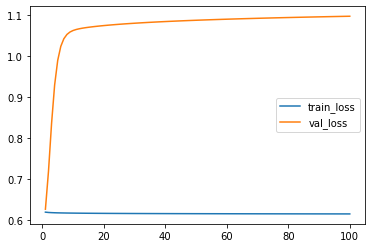

In [59]:
x = range(1, len(train_hist)+1)
plt.plot(x, train_hist, label="train_loss")
plt.plot(x, val_hist, label="val_loss")
plt.legend();

In [60]:
y_train_pred = (sigmoid(X_train @ w) > 0.5).astype(np.int)
y_train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
confusion_matrix(y_train, y_train_pred)

array([[14, 57],
       [ 0, 37]])

In [62]:
y_val_pred = (sigmoid(X_val @ w) > 0.5).astype(np.int)
y_val_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1])

In [63]:
confusion_matrix(y_val, y_val_pred)

array([[ 3, 14],
       [ 0, 10]])

In [64]:
y_test_pred = (sigmoid(X_test @ w) > 0.5).astype(np.int)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [65]:
confusion_matrix(y_test, y_test_pred)

array([[ 1, 11],
       [ 0,  3]])

### Leon Bottou's learning schedule

In [66]:
np.zeros(1)

array([0.])

In [67]:
np.zeros(1).dtype

dtype('float64')

In [147]:
def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], lr=0.1, alpha=0.0001, epochs=5, tolerance=0.0001, print_progress=True):
    def learning_schedule(t):
        epsilon = 1e-5
        return 1 / (t * alpha + epsilon)
    train_loss_history, val_loss_history = [], []
    num_features = X_tr.shape[1]
    weights = np.zeros(shape=(num_features,))
    #weights = np.zeros(shape=(num_features,), dtype=np.float64)
    #weights = np.random.randn(num_features)
    #clip_value = 1e-9
    #X_tr = np.clip(X_tr, clip_value, 1-clip_value)
    mms = MinMaxScaler()
    #mms = StandardScaler()
    X_tr = mms.fit_transform(X_tr)
    best_val_loss = np.inf
    for epoch in range(epochs):
        indices = np.arange(X_tr.shape[0])
        np.random.shuffle(indices)
        X_tr = X_tr[indices]
        Y_tr = Y_tr[indices]

        # training loop
        train_loss = 0
        for idx, row in enumerate(X_tr):
            row = np.reshape(row, (1, num_features))
            train_loss += binary_loss(row, Y_tr[idx], weights, alpha)
            eta = learning_schedule(epoch*len(X_tr) + idx + 1)
            for i in range(len(row)):
                #gradient = (sigmoid(row @ weights) - float(Y_tr[idx])) * row[0, i] + alpha*weights[i]*2
                gradient = (sigmoid(row @ weights) - Y_tr[idx]) * row[0, i] + alpha*weights[i]*2
                
                #weights[i] -= lr*gradient
                weights[i] -= gradient*eta
        train_loss /= X_tr.shape[0]
        train_loss_history.append(train_loss)

        if len(X_dev) != 0 and len(Y_dev) != 0:
            X_dev = mms.transform(X_dev)
            val_loss = binary_loss(X_dev, Y_dev, weights, alpha)
            val_loss_history.append(val_loss)

            if print_progress:
                print(f"Epoch: {epoch+1}")
                print(f"Training loss:   {train_loss:.4f}")
                print(f"Validation loss: {val_loss:.4f}")

            # Wang seems to want the training process to stop when the progress becomes no longer significant.
            #if epoch >=1:
            #    if np.abs(val_loss_history[epoch]-val_loss_history[epoch-1]) < tolerance:
            #        break
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_weights = weights
                print(f"best epoch {epoch}")

    return best_weights, train_loss_history, val_loss_history

In [148]:
n_epochs = 100
#w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=False)
w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=False, alpha=1e-1)
#w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=False, alpha=0)

best epoch 0
best epoch 1


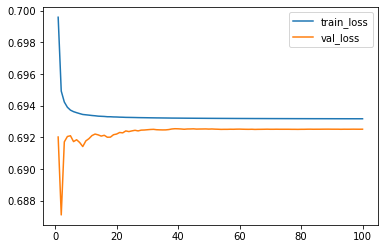

In [150]:
x = range(1, len(train_hist)+1)
plt.plot(x, train_hist, label="train_loss")
plt.plot(x, val_hist, label="val_loss")
plt.legend();

In [151]:
y_train_pred = (sigmoid(X_train @ w) > 0.5).astype(np.int)
y_train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [152]:
confusion_matrix(y_train, y_train_pred)

array([[ 0, 71],
       [ 0, 37]])

In [153]:
y_val_pred = (sigmoid(X_val @ w) > 0.5).astype(np.int)
y_val_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [154]:
confusion_matrix(y_val, y_val_pred)

array([[ 0, 17],
       [ 0, 10]])

In [155]:
y_test_pred = (sigmoid(X_test @ w) > 0.5).astype(np.int)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [119]:
confusion_matrix(y_test, y_test_pred)

array([[ 0, 12],
       [ 0,  3]])

### Did you notice that?
`SGD()` tends to give all `1`'s or all `0`'s as prediction.<br>
**(?)** Why was that?

### Bias term again

In [94]:
n_epochs = 200
w, train_hist, val_hist = SGD(X_t, y_train, X_dev=X_v, Y_dev=y_val, epochs=n_epochs, print_progress=False)

/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == 

best epoch 1
best epoch 2
best epoch 13
best epoch 28
best epoch 41
best epoch 53
best epoch 58
best epoch 70
best epoch 144


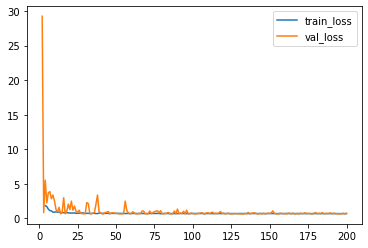

In [95]:
x = range(1, len(train_hist)+1)
plt.plot(x, train_hist, label="train_loss")
plt.plot(x, val_hist, label="val_loss")
plt.legend();

In [96]:
y_val_pred = (sigmoid((X_v @ w)) > 0.5).astype(np.int)
y_val_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [97]:
confusion_matrix(y_val, y_val_pred)

array([[17,  0],
       [10,  0]])

In [98]:
y_test_pred = (sigmoid(X_te @ w) > 0.5).astype(np.int)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [99]:
confusion_matrix(y_test, y_test_pred)

array([[12,  0],
       [ 3,  0]])

### `fit_intercept`? Bias term wrong?

In [83]:
def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], lr=0.1, alpha=0.0001, epochs=5, tolerance=0.0001, print_progress=True):
    def learning_schedule(t):
        epsilon = 1e-5
        return 1 / (t * alpha + epsilon)
    train_loss_history, val_loss_history = [], []
    
    mms = MinMaxScaler()
    #mms = StandardScaler()
    X_tr = mms.fit_transform(X_tr)
    X_tr = np.hstack([X_tr, np.ones((X_tr.shape[0], 1))])
    num_features = X_tr.shape[1]
    weights = np.zeros(shape=(num_features,))
    #weights = np.zeros(shape=(num_features,), dtype=np.float64)
    #weights = np.random.randn(num_features)
    #clip_value = 1e-9
    #X_tr = np.clip(X_tr, clip_value, 1-clip_value)
    best_val_loss = np.inf
    for epoch in range(epochs):
        indices = np.arange(X_tr.shape[0])
        np.random.shuffle(indices)
        X_tr = X_tr[indices]
        Y_tr = Y_tr[indices]

        # training loop
        train_loss = 0
        for idx, row in enumerate(X_tr):
            row = np.reshape(row, (1, num_features))
            train_loss += binary_loss(row, Y_tr[idx], weights, alpha)
            for i in range(len(row)):
                #gradient = (sigmoid(row @ weights) - float(Y_tr[idx])) * row[0, i] + alpha*weights[i]*2
                gradient = (sigmoid(row @ weights) - Y_tr[idx]) * row[0, i] + alpha*weights[i]*2
                eta = learning_schedule(epoch*idx + i)
                #weights[i] -= lr*gradient
                weights[i] -= gradient*eta
        train_loss /= X_tr.shape[0]
        train_loss_history.append(train_loss)

        if len(X_dev) != 0 and len(Y_dev) != 0:
            X_dev = mms.transform(X_dev)
            X_dex = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
            #val_loss = binary_loss(X_dev, Y_dev, weights[:-1], alpha)
            val_loss = binary_loss(X_dex, Y_dev, weights, alpha)
            val_loss_history.append(val_loss)

            if print_progress:
                print(f"Epoch: {epoch+1}")
                print(f"Training loss:   {train_loss:.4f}")
                print(f"Validation loss: {val_loss:.4f}")

            # Wang seems to want the training process to stop when the progress becomes no longer significant.
            #if epoch >=1:
            #    if np.abs(val_loss_history[epoch]-val_loss_history[epoch-1]) < tolerance:
            #        break
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_weights = weights
                print(f"best epoch {epoch}")

    return best_weights, train_loss_history, val_loss_history

In [84]:
n_epochs = 200
w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=True)
#w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=False, alpha=0)

/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountere

Epoch: 1
Training loss:   nan
Validation loss: nan
Epoch: 2
Training loss:   nan
Validation loss: nan
Epoch: 3
Training loss:   nan
Validation loss: nan
Epoch: 4
Training loss:   nan
Validation loss: nan
Epoch: 5
Training loss:   nan
Validation loss: nan
Epoch: 6
Training loss:   nan
Validation loss: nan
Epoch: 7
Training loss:   nan
Validation loss: nan
Epoch: 8
Training loss:   nan
Validation loss: nan
Epoch: 9
Training loss:   nan
Validation loss: nan
Epoch: 10
Training loss:   nan
Validation loss: nan
Epoch: 11
Training loss:   nan
Validation loss: nan
Epoch: 12
Training loss:   nan
Validation loss: nan
Epoch: 13
Training loss:   nan
Validation loss: nan
Epoch: 14
Training loss:   nan
Validation loss: nan
Epoch: 15
Training loss:   nan
Validation loss: nan
Epoch: 16
Training loss:   nan
Validation loss: nan
Epoch: 17
Training loss:   nan
Validation loss: nan
Epoch: 18
Training loss:   nan
Validation loss: nan
Epoch: 19
Training loss:   nan
Validation loss: nan
Epoch: 20
Training lo

/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == 

Epoch: 37
Training loss:   nan
Validation loss: nan
Epoch: 38
Training loss:   nan
Validation loss: nan
Epoch: 39
Training loss:   nan
Validation loss: nan
Epoch: 40
Training loss:   nan
Validation loss: nan
Epoch: 41
Training loss:   nan
Validation loss: nan
Epoch: 42
Training loss:   nan
Validation loss: nan
Epoch: 43
Training loss:   nan
Validation loss: nan
Epoch: 44
Training loss:   nan
Validation loss: nan
Epoch: 45
Training loss:   nan
Validation loss: nan
Epoch: 46
Training loss:   nan
Validation loss: nan
Epoch: 47
Training loss:   nan
Validation loss: nan
Epoch: 48
Training loss:   nan
Validation loss: nan
Epoch: 49
Training loss:   nan
Validation loss: nan
Epoch: 50
Training loss:   nan
Validation loss: nan
Epoch: 51
Training loss:   nan
Validation loss: nan
Epoch: 52
Training loss:   nan
Validation loss: nan
Epoch: 53
Training loss:   nan
Validation loss: nan
Epoch: 54
Training loss:   nan
Validation loss: nan
Epoch: 55
Training loss:   nan
Validation loss: nan
Epoch: 56
Tr

/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == 

Epoch: 70
Training loss:   nan
Validation loss: nan
Epoch: 71
Training loss:   nan
Validation loss: nan
Epoch: 72
Training loss:   nan
Validation loss: nan
Epoch: 73
Training loss:   nan
Validation loss: nan
Epoch: 74
Training loss:   nan
Validation loss: nan
Epoch: 75
Training loss:   nan
Validation loss: nan
Epoch: 76
Training loss:   nan
Validation loss: nan
Epoch: 77
Training loss:   nan
Validation loss: nan
Epoch: 78
Training loss:   nan
Validation loss: nan
Epoch: 79
Training loss:   nan
Validation loss: nan
Epoch: 80
Training loss:   nan
Validation loss: nan
Epoch: 81
Training loss:   nan
Validation loss: nan
Epoch: 82
Training loss:   nan
Validation loss: nan
Epoch: 83
Training loss:   nan
Validation loss: nan
Epoch: 84
Training loss:   nan
Validation loss: nan
Epoch: 85
Training loss:   nan
Validation loss: nan
Epoch: 86
Training loss:   nan
Validation loss: nan
Epoch: 87
Training loss:   nan
Validation loss: nan
Epoch: 88
Training loss:   nan
Validation loss: nan
Epoch: 89
Tr

/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountere

Epoch: 104
Training loss:   nan
Validation loss: nan
Epoch: 105
Training loss:   nan
Validation loss: nan
Epoch: 106
Training loss:   nan
Validation loss: nan
Epoch: 107
Training loss:   nan
Validation loss: nan
Epoch: 108
Training loss:   nan
Validation loss: nan
Epoch: 109
Training loss:   nan
Validation loss: nan
Epoch: 110
Training loss:   nan
Validation loss: nan
Epoch: 111
Training loss:   nan
Validation loss: nan
Epoch: 112
Training loss:   nan
Validation loss: nan
Epoch: 113
Training loss:   nan
Validation loss: nan
Epoch: 114
Training loss:   nan
Validation loss: nan
Epoch: 115
Training loss:   nan
Validation loss: nan
Epoch: 116
Training loss:   nan
Validation loss: nan
Epoch: 117
Training loss:   nan
Validation loss: nan
Epoch: 118
Training loss:   nan
Validation loss: nan
Epoch: 119
Training loss:   nan
Validation loss: nan
Epoch: 120
Training loss:   nan
Validation loss: nan
Epoch: 121
Training loss:   nan
Validation loss: nan
Epoch: 122
Training loss:   nan
Validation los

/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == 

Epoch: 138
Training loss:   nan
Validation loss: nan
Epoch: 139
Training loss:   nan
Validation loss: nan
Epoch: 140
Training loss:   nan
Validation loss: nan
Epoch: 141
Training loss:   nan
Validation loss: nan
Epoch: 142
Training loss:   nan
Validation loss: nan
Epoch: 143
Training loss:   nan
Validation loss: nan
Epoch: 144
Training loss:   nan
Validation loss: nan
Epoch: 145
Training loss:   nan
Validation loss: nan
Epoch: 146
Training loss:   nan
Validation loss: nan
Epoch: 147
Training loss:   nan
Validation loss: nan
Epoch: 148
Training loss:   nan
Validation loss: nan
Epoch: 149
Training loss:   nan
Validation loss: nan
Epoch: 150
Training loss:   nan
Validation loss: nan
Epoch: 151
Training loss:   nan
Validation loss: nan
Epoch: 152
Training loss:   nan
Validation loss: nan
Epoch: 153
Training loss:   nan
Validation loss: nan
Epoch: 154
Training loss:   nan
Validation loss: nan
Epoch: 155
Training loss:   nan
Validation loss: nan
Epoch: 156
Training loss:   nan
Validation los

UnboundLocalError: local variable 'best_weights' referenced before assignment

In [ ]:
y_val_pred = (sigmoid((X_v @ w)) > 0.5).astype(np.int)
y_val_pred

In [ ]:
confusion_matrix(y_val, y_val_pred)

In [ ]:
y_test_pred = (sigmoid(X_te @ w) > 0.5).astype(np.int)
y_test_pred

In [ ]:
confusion_matrix(y_test, y_test_pred)